<a href="https://colab.research.google.com/github/shubhi1488/MachineLearning_Models/blob/main/CarPricePredictionUsingXGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
car_dataset=pd.read_csv("/content/used_cars.csv")

In [3]:
car_dataset.head(5)

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,link,condition,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,4,5,3,25655,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,4,5,2,15590,https://www.carvana.com/vehicle/2386932,NaN,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,4,5,3,13590,https://www.carvana.com/vehicle/2586884#vehicl...,NaN,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,4,5,2,20590,https://www.carvana.com/vehicle/2558137,NaN,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,4,5,3,16787,https://www.carfax.com/vehicle/5NPD74LF6KH413647,4.0,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [4]:
car_dataset.shape

(52, 27)

In [5]:
print(car_dataset)

    id       brand       model  ...  rear_headroom  rear_legroom  service_records
0    3   Chevrolet     Volt LT  ...           35.8          34.7                4
1    6     Hyundai  Elantra SE  ...           37.0          35.7               16
2    7        Ford       Focus  ...           38.0          33.2               13
3    8       Honda       Civic  ...           36.8          37.4               26
4    9     Hyundai  Elantra SE  ...           37.0          35.7                5
5   11       Honda       Civic  ...           36.8          37.4               13
6   12      Subaru      Legacy  ...           37.2          39.5                6
7   13       Honda     Clarity  ...           37.1          36.2                2
8   14  Volkswagen       Jetta  ...           37.2          37.4                6
9   15  Volkswagen       Jetta  ...           37.1          38.1               13
10  16       Honda       Civic  ...           36.2          36.2               15
11  17       Hon

In [6]:
car_price_dataframe=car_dataset.drop('price',axis=1)

In [7]:
car_price_dataframe.head(5)

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,link,condition,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,4,5,3,https://www.autotrader.com/cars-for-sale/vehic...,NaN,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,4,5,2,https://www.carvana.com/vehicle/2386932,NaN,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,4,5,3,https://www.carvana.com/vehicle/2586884#vehicl...,NaN,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,4,5,2,https://www.carvana.com/vehicle/2558137,NaN,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,4,5,3,https://www.carfax.com/vehicle/5NPD74LF6KH413647,4.0,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [8]:
car_price_dataframe.shape

(52, 26)

In [9]:
car_price_dataframe.isnull().sum()

,0
id,0
brand,0
model,0
year,0
miles,0
city_mileage,0
highway_mileage,0
horsepower,0
torque,0
engine_capacity_litre,0


In [10]:
car_price_dataframe['condition'] = car_price_dataframe['condition'].fillna(car_price_dataframe['condition'].mode()[0])


In [11]:
car_price_dataframe['speed_levels'] = car_price_dataframe['speed_levels'].fillna(car_price_dataframe['speed_levels'].mode()[0])


In [12]:
car_price_dataframe.isnull().sum()

,0
id,0
brand,0
model,0
year,0
miles,0
city_mileage,0
highway_mileage,0
horsepower,0
torque,0
engine_capacity_litre,0


In [14]:
car_price_dataframe.describe()

,id,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,condition,doors,wheel_drive,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.0,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,31.365385,2018.673077,33901.250000,29.038462,37.423077,176.865385,177.923077,1.832692,14.232692,4.038462,5.0,1.346154,4.0,4.0,2.153846,6.307692,38.680769,42.467308,37.238462,37.632692,7.326923
std,15.378912,1.396370,22700.646139,5.947356,4.136619,33.793507,47.256433,0.379743,2.603973,0.277350,0.0,0.622601,0.0,0.0,0.538138,0.755073,0.919087,1.045198,0.444202,1.604249,4.714272
min,3.000000,2014.000000,5000.000000,17.000000,24.000000,143.000000,99.000000,1.400000,7.000000,4.000000,5.0,1.000000,4.0,4.0,2.000000,6.000000,37.500000,41.100000,35.800000,33.200000,1.000000
25%,18.750000,2018.000000,16454.750000,26.500000,35.750000,152.000000,138.000000,1.500000,12.400000,4.000000,5.0,1.000000,4.0,4.0,2.000000,6.000000,37.725000,42.200000,37.075000,37.175000,4.000000
50%,31.500000,2019.000000,27448.500000,30.000000,38.000000,159.500000,181.000000,2.000000,13.600000,4.000000,5.0,1.000000,4.0,4.0,2.000000,6.000000,38.500000,42.300000,37.200000,37.400000,6.000000
75%,44.250000,2019.250000,42442.000000,30.000000,40.000000,192.000000,192.000000,2.000000,15.050000,4.000000,5.0,2.000000,4.0,4.0,2.000000,6.000000,39.300000,42.400000,37.500000,38.300000,10.000000
max,57.000000,2022.000000,97027.000000,55.000000,49.000000,288.000000,294.000000,3.500000,19.000000,6.000000,5.0,3.000000,4.0,4.0,4.000000,9.000000,40.400000,45.500000,38.000000,40.400000,26.000000


If any dataset contains the string values then also we can find the correlation between the features we need to convert string values to numerical values by performing label encoding like one hot encoding etc.

In [18]:
car_price_dataframe.dtypes

,0
id,int64
brand,int64
model,int64
year,int64
miles,int64
city_mileage,int64
highway_mileage,int64
horsepower,int64
torque,int64
engine_capacity_litre,float64


In [22]:
car_price_dataframe.head(5)


,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,link,condition,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,0,14,2019,27173,43,42,149,294,1.5,8.9,4,5,3,22,4.0,0,4,2,1,6.0,37.8,42.1,35.8,34.7,4
1,6,3,3,2017,76941,29,38,146,132,2.0,14.0,4,5,2,48,4.0,0,4,2,0,6.0,39.0,42.2,37.0,35.7,16
2,7,1,4,2014,97027,27,37,159,146,2.0,12.4,4,5,3,50,4.0,0,4,2,0,6.0,38.3,43.7,38.0,33.2,13
3,8,2,1,2016,95396,31,42,158,138,1.5,12.4,4,5,2,49,4.0,0,4,2,0,6.0,37.5,42.3,36.8,37.4,26
4,9,3,3,2019,28405,29,38,147,132,2.0,14.0,4,5,3,47,4.0,0,4,2,0,6.0,39.0,42.2,37.0,35.7,5


In [23]:
car_price_dataframe['price']=car_dataset['price']

In [24]:
car_price_dataframe.head(5)

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,link,condition,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records,price
0,3,0,14,2019,27173,43,42,149,294,1.5,8.9,4,5,3,22,4.0,0,4,2,1,6.0,37.8,42.1,35.8,34.7,4,25655
1,6,3,3,2017,76941,29,38,146,132,2.0,14.0,4,5,2,48,4.0,0,4,2,0,6.0,39.0,42.2,37.0,35.7,16,15590
2,7,1,4,2014,97027,27,37,159,146,2.0,12.4,4,5,3,50,4.0,0,4,2,0,6.0,38.3,43.7,38.0,33.2,13,13590
3,8,2,1,2016,95396,31,42,158,138,1.5,12.4,4,5,2,49,4.0,0,4,2,0,6.0,37.5,42.3,36.8,37.4,26,20590
4,9,3,3,2019,28405,29,38,147,132,2.0,14.0,4,5,3,47,4.0,0,4,2,0,6.0,39.0,42.2,37.0,35.7,5,16787


In [27]:
#performing the encoding of the string values-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in car_price_dataframe.select_dtypes(include='object').columns:
  car_price_dataframe[col]=le.fit_transform(car_price_dataframe[col])

In [28]:
correlation=car_price_dataframe.corr()

<Axes: >

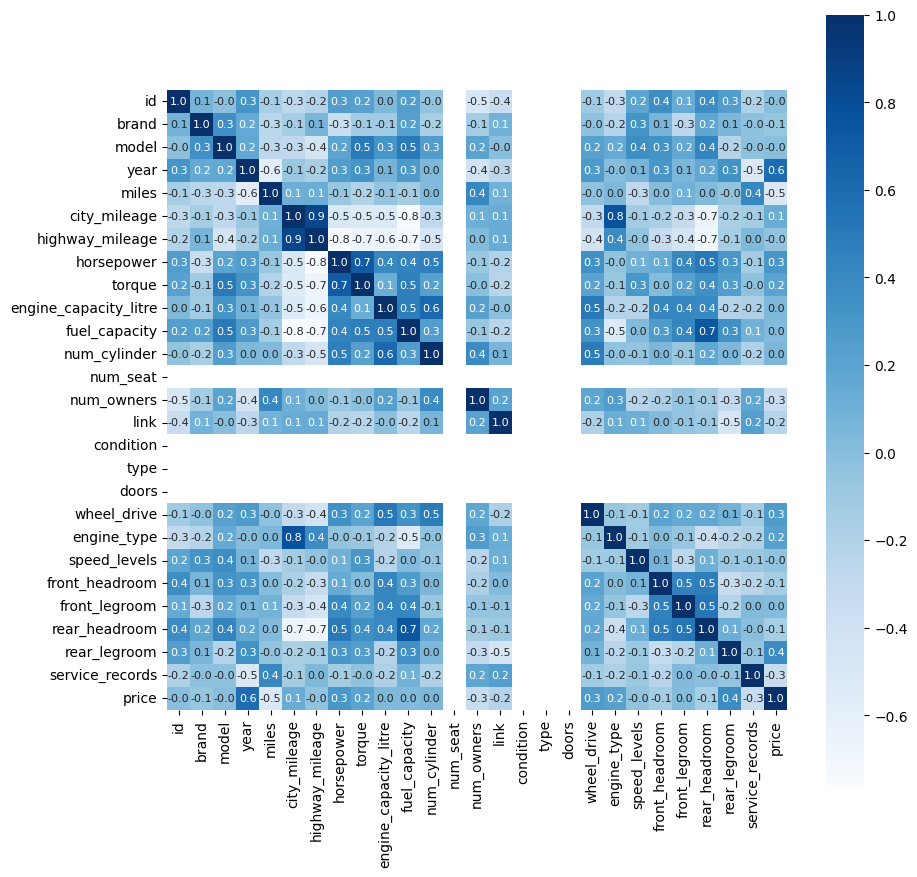

In [29]:
#construction of the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size': 8},cmap='Blues')

In [25]:
X=car_price_dataframe.drop(columns='price',axis=1)
Y=car_price_dataframe['price']

In [26]:
print(X,Y)

    id  brand  model  ...  rear_headroom  rear_legroom  service_records
0    3      0     14  ...           35.8          34.7                4
1    6      3      3  ...           37.0          35.7               16
2    7      1      4  ...           38.0          33.2               13
3    8      2      1  ...           36.8          37.4               26
4    9      3      3  ...           37.0          35.7                5
5   11      2      1  ...           36.8          37.4               13
6   12      4      9  ...           37.2          39.5                6
7   13      2      2  ...           37.1          36.2                2
8   14      5      8  ...           37.2          37.4                6
9   15      5      8  ...           37.1          38.1               13
10  16      2      1  ...           36.2          36.2               15
11  17      2      1  ...           36.8          37.4                4
12  18      2      1  ...           36.8          37.4          

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(52, 26) (41, 26) (11, 26)


In [32]:
model=XGBRegressor()

In [33]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [34]:
tarining_data_predictions=model.predict(X_train)

In [35]:
print(tarining_data_predictions)

[19450.002 25491.    21998.996 25990.996 22898.998 21987.998 19542.002
 21994.    21590.998 22987.998 17993.    19998.    26787.994 13590.002
 24497.998 17880.006 33776.992 24498.    25459.998 15795.    18276.998
 22476.    16787.002 20590.002 22993.    26788.006 17488.002 20900.002
 22999.004 22994.998 19877.002 26999.    19403.    22688.004 21997.998
 22987.998 18948.996 22490.996 21680.    22360.002 22991.002]


In [36]:
score_1=metrics.r2_score(Y_train,tarining_data_predictions)

In [37]:
score_2=metrics.mean_absolute_error(Y_train,tarining_data_predictions)

In [38]:
print(score_1,score_2)

1.0 0.0021436738315969706


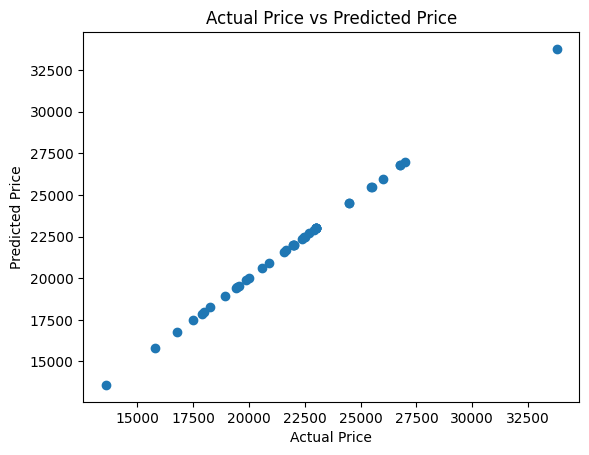

In [39]:
plt.scatter(Y_train,tarining_data_predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [40]:
test_data_predictions=model.predict(X_test)

In [41]:
print(test_data_predictions)

[21534.96  22769.723 20995.459 21604.086 19897.37  15790.033 20299.016
 14421.762 23719.975 25737.84  20894.28 ]


In [42]:
score_3=metrics.r2_score(Y_test,test_data_predictions)
score_4=metrics.mean_absolute_error(Y_test,test_data_predictions)

In [43]:
print(score_3)

-0.24569833278656006


In [44]:
print(score_4)

2639.7392578125
